In [318]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [319]:
data = pd.read_csv("diabetes.csv")
data.shape

(768, 8)

In [320]:
data.head(5)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [321]:
data.isnull().values.any()

False

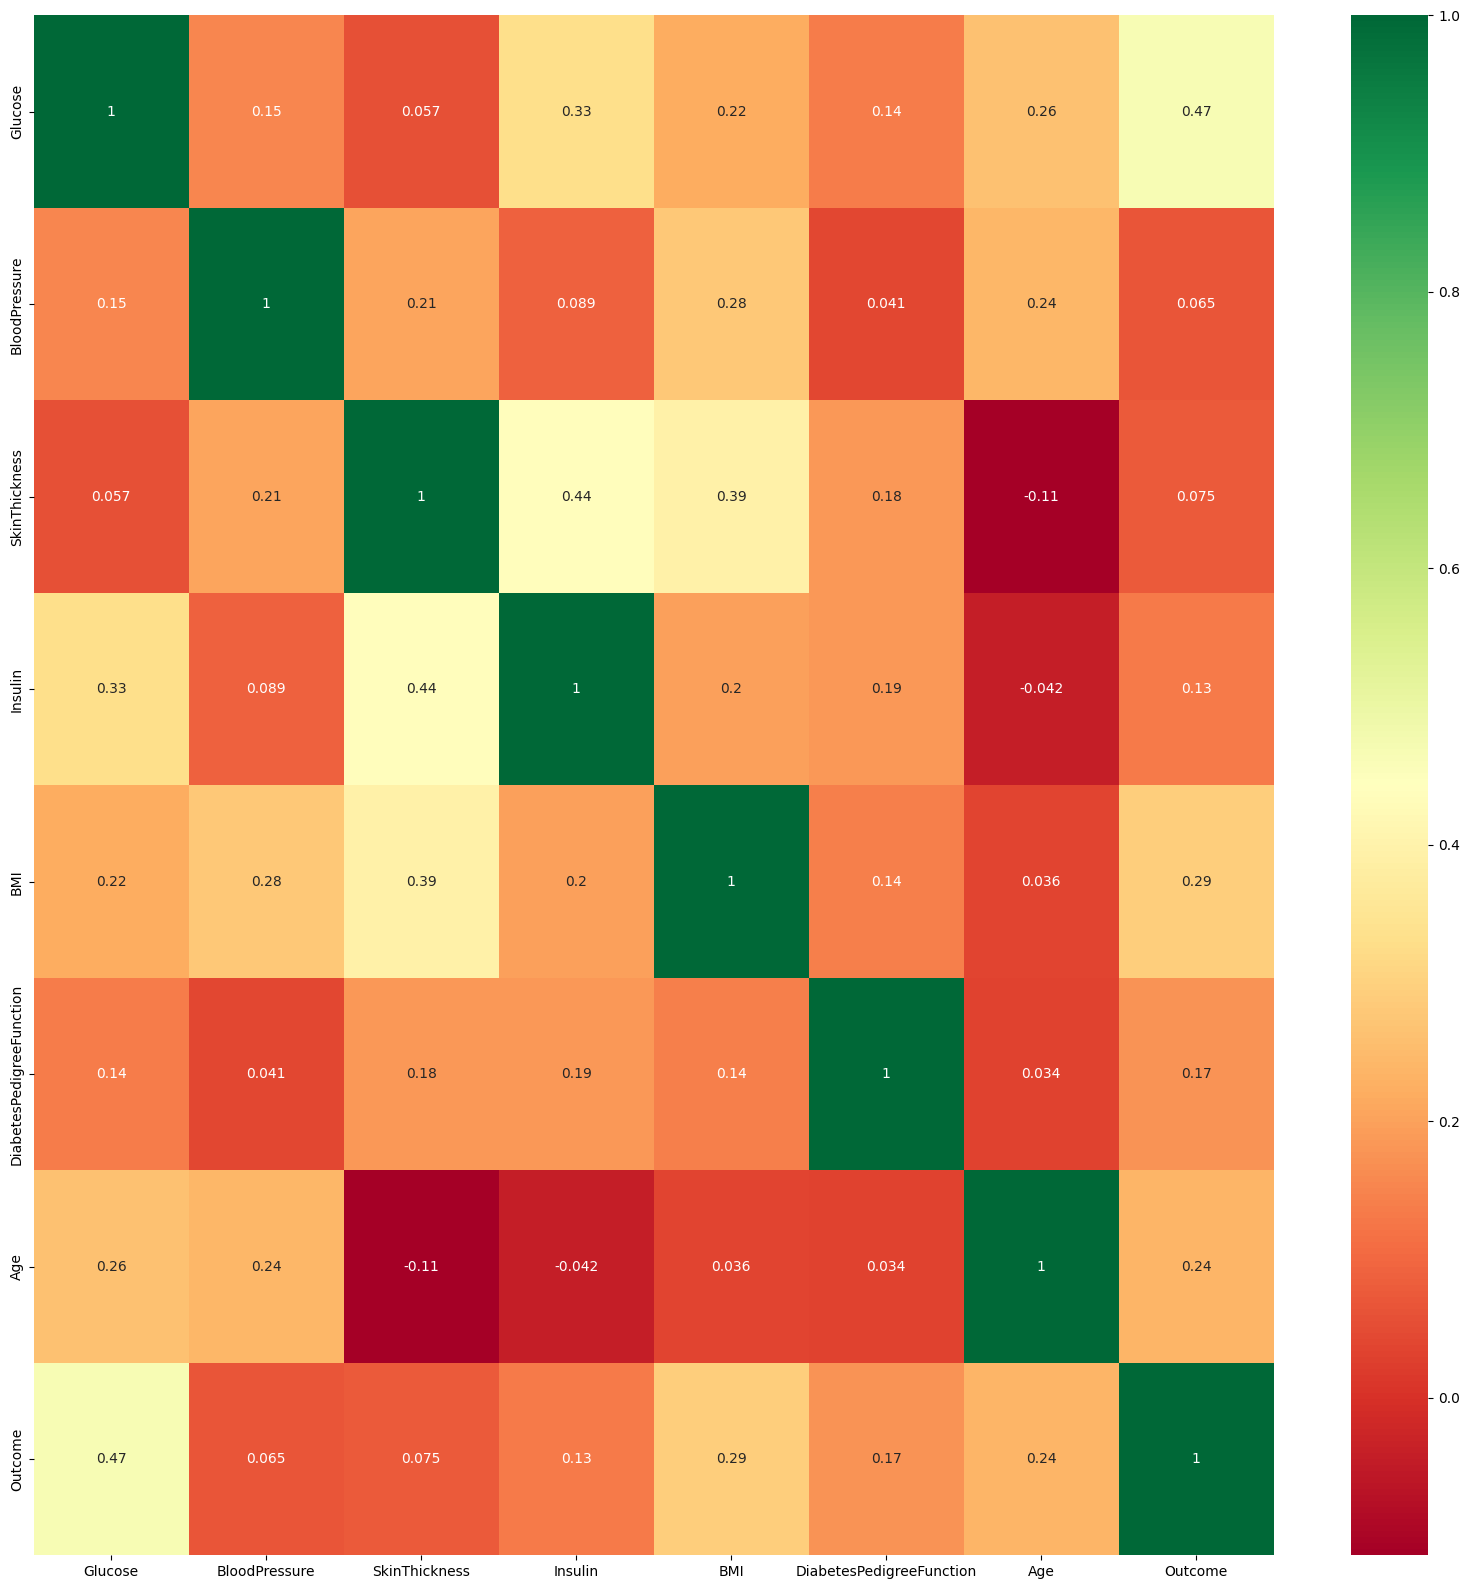

In [322]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [323]:
data.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [325]:
diabetes_map = {True: 1, False: 0}


In [326]:
data['Outcome'] = data['Outcome'].map(diabetes_map)

In [327]:
data.head(5)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,NaN
1,85,66,29,0,26.6,0.351,31,NaN
2,183,64,0,0,23.3,0.672,32,NaN
3,89,66,23,94,28.1,0.167,21,NaN
4,137,40,35,168,43.1,2.288,33,NaN


In [328]:
diabetes_true_count = len(data.loc[data['Outcome'] == True])
diabetes_false_count = len(data.loc[data['Outcome'] == False])

In [329]:
(diabetes_true_count,diabetes_false_count)

(0, 0)

In [330]:
from sklearn.model_selection import train_test_split
feature_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class = ['Outcome']



In [331]:
X = data[feature_columns].values
y = data[predicted_class].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [332]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing blood pressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['Age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['SkinThickness'] == 0])))

total number of rows : 768
number of rows missing glucose: 5
number of rows missing blood pressure: 35
number of rows missing SkinThickness: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [333]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [334]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train)

ValueError: Input y contains NaN.